# IoT Equipment Failure Prediction using Sensor data
##  Environment Setup
###  Import dependent libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import pdb
import json
import re
import requests
import sys
import types
#import ibm_boto3

In [2]:
# Import libraries
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from botocore.client import Config

##  Create IoT Predictive Analytics Functions

In [3]:
# Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)

# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model

# Function to return Predicted values
def score_data(trained_model, x_vals):
    ypredict = trained_model.predict(x_vals)
    return ypredict

# Function to calculate Prediction accuracy of model
def model_accuracy(trained_model, variables, targets):
    accuracy_score = trained_model.score(variables, targets)
    return accuracy_score

# Function to generate Confusion matrix
def confusion_matrix(actfail, predictfail):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(actfail), len(predictfail))
  # print(actfail, predictfail)
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(actfail)):
      if (actfail[i]==0 and predictfail[i]==0):
          anpn = anpn + 1
      elif (actfail[i]==0 and predictfail[i]==1):
          anpy = anpy + 1
      elif (actfail[i]==1 and predictfail[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")


In [4]:

df_iotdata = pd.read_csv('./iot_sensor_dataset.csv')

# Check Number of observations read for analysis
print ("Number of Observations :", len(df_iotdata))
# Inspect a few observations
df_iotdata.head()


Number of Observations : 944


,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [5]:
# Print dataset column names
datacolumns = dataset_columns(df_iotdata)
print ("Data set columns : ", list(datacolumns))

Data set columns :  ['footfall', 'atemp', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'outpressure', 'inpressure', 'temp', 'fail']


In [6]:
### Feature extraction

In [7]:
v_feature_list = ['atemp', 'PID', 'outpressure', 'inpressure', 'temp']
v_target = 'fail'
v_train_datasize = 0.7

### Train test split

In [8]:
# Split Training and Testing data
train_x, test_x, train_y, test_y = train_test_split(df_iotdata[v_feature_list], df_iotdata[v_target], train_size=0.7)
print ("Train x counts : ", len(train_x), len(train_x.columns.values))
print ("Train y counts : ", len(train_y))
 
print ("Test x counts : ", len(test_x), len(test_x.columns.values))
print ("Test y counts : ", len(test_y))


Train x counts :  660 5
Train y counts :  660
Test x counts :  284 5
Test y counts :  284


D:\Anaconda\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


###  Train the Predictive model

In [9]:
# Training Logistic regression model
trained_logistic_regression_model = train_logistic_regression(train_x, train_y)

train_accuracy = model_accuracy(trained_logistic_regression_model, train_x, train_y)

# Testing the logistic regression model
test_accuracy = model_accuracy(trained_logistic_regression_model, test_x, test_y)

print ("Training Accuracy : ", round(train_accuracy * 100, 2), "%")



Training Accuracy :  90.61 %


D:\Anaconda\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Score the Test data using the Trained model

In [10]:
# Model accuracy: Score and construct Confusion matrix for Test data
actfail = test_y.values
predictfail = score_data(trained_logistic_regression_model, test_x)


In [11]:
predictfail

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

##  Confusion matrix for deeper analysis of Prediction accuracy
#####   Confusion matrix outputs below can be used for calculating more customised Accuracy metrics

In [12]:
# Print Count of Actual fails, Predicted fails
# Print Confusion matrix
confusion_matrix(actfail, predictfail)

Actual, Predicted Observations:   284 284
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       138            18
Actual Y       10            118
--------------------------------------------
Total observations  :   284
False Positives     :   18
False Negatives     :   10
Overall Accuracy    :   90.14 %
Sensitivity/Recall  :   92.19 %
Specificity         :   88.46 %
Precision           :   86.76 %
--------------------------------------------


###  Convert as python file


In [13]:
!jupyter nbconvert --to script iotfailure_prediction.ipynb

[NbConvertApp] Converting notebook iotfailure_prediction.ipynb to script
[NbConvertApp] Writing 4798 bytes to iotfailure_prediction.py


###  Persist to filesystem, load and predict on new data

In [15]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(trained_logistic_regression_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = score_data(loaded_model, test_x)
print(result)

[0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1]


In [26]:
test_x[1:2].to_json()

'{"atemp":{"787":1},"PID":{"787":6},"outpressure":{"787":35},"inpressure":{"787":7},"temp":{"787":22}}'

In [36]:
dict_new_data = {"atemp":[1],"PID":[6],"outpressure":[35],"inpressure":[7],"temp":[22]}
df_new_data = pd.DataFrame.from_dict(dict_new_data)
df_new_data

,atemp,PID,outpressure,inpressure,temp
0,1,6,35,7,22


In [39]:
#predict single 

result = (loaded_model.predict(df_new_data))
result.tolist()[0]

array([1], dtype=int64)

## More experiments
### Trying Multiple Classifiers

In [44]:
# Try binary classifiers
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

seed = 7
scoring = 'accuracy'

In [46]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.901515 (0.027938)
LDA: 0.903030 (0.022677)
KNN: 0.843939 (0.017008)
CART: 0.813636 (0.018924)
NB: 0.903030 (0.025080)
SVM: 0.766667 (0.016872)


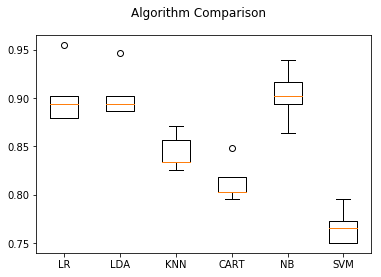

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
#cnf_matrix_tra = confusion_matrix(Y_test, predictions)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()
